**Date Extraction**

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.set_theme(style="whitegrid")

df = pd.read_csv(r'D:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\selected_dataset\DiaHealth A Bangladeshi Dataset for Type 2 Diabetes Prediction\Cleaned_Datasets\Diabetes_Final_Data_Cleaned_v2.csv')
df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,0,66,110,73,5.88,25.75,0,0,0,0,0,0
1,35,0,60,125,68,5.71,19.58,0,0,0,0,0,0
2,62,0,57,127,74,6.85,20.24,0,0,0,0,0,0
3,68,0,71,150,81,5.71,17.79,0,0,0,0,0,0
4,40,1,48,131,73,7.22,23.42,0,0,0,0,0,0


**Warning Compresser**

In [139]:
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')

print("Warnings suppressed!")

Warnings suppressed!


**Feature-target Correlation**

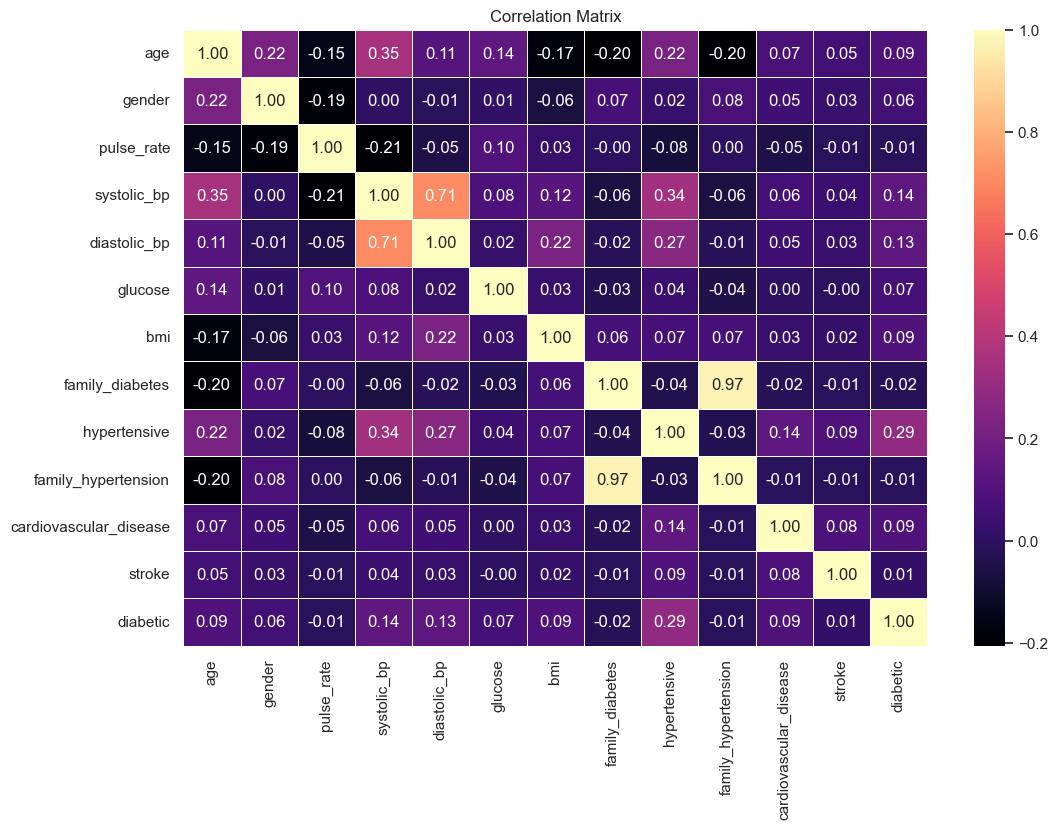

In [107]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

We would like to drop some columns since they somehow have negative relationships with target.

In [109]:
# df = df.drop(['pulse_rate', 'family_diabetes', 'family_hypertension', 'stroke', 'cardiovascular_disease', 'gender', 'hypertensive'], axis=1)
# df = df.drop(['pulse_rate', 'family_diabetes', 'family_hypertension'], axis=1)
print(f'The remained columns are: {df.columns[:-1].tolist()}')

The remained columns are: ['age', 'gender', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'bmi', 'family_diabetes', 'hypertensive', 'family_hypertension', 'cardiovascular_disease', 'stroke']


# **1. Model Construction (Pending)**

**Split Data**

In [110]:
# copy the original data
df_1 = df.copy()
df.shape

(4647, 13)

For spliting data, we will split data into two sections known as `Train` and `Test` datasets. The prportion of split data is 70:30

In [111]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_1.drop('diabetic', axis=1)
y = df_1['diabetic']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data Scaled!!")

Data Scaled!!


## **1.2. Initial Model Test**

We are going to build some models that operate without scaling the data.

**Functions**

First, we are gonna build some functions, such as `correlatio headmap`, `confusion metrix`, `classification report`, and `roc and auc` to see the model performance

In [112]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# plot heatmap for confustion metrix
def plot_correlation_heatmap(y_test, y_pred, name:str) -> None:
    confusion_matrix_report = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_matrix_report, annot=True, fmt=".0f", cmap="Reds", linewidth=.5)
    plt.title(f"Confusion Metrics for {name}", fontsize=15, fontweight='bold')
    plt.ylabel("Actual Classes")
    plt.xlabel("Predicted Classes")
    plt.show()

# function to print model performance report (for initial model evaluation)
def confusion_metrix_and_classification_report(model, X_train, X_test, y_train, y_test):
    '''### This model returns model specified along evaluaton metrics'''

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # plot confusion matrix
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # return the model
    return model


# function to plot ROC and AUC
def plot_roc_auc(model, X_test, y_test) -> None:
    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Create ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()
    
    # Compute AUC
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC: {auc:.4f}")
    
print("Performance Functions Defined!!")

Performance Functions Defined!!


### **1.2.1. Models Unaffected by Scaling**

#### **1.2.1.1. Fresh Trained Models**

##### **Decision Trees**

**Model and Evaluation**

In [113]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model and print the performance report
model_dt = confusion_metrix_and_classification_report(DecisionTreeClassifier(random_state=42), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[1293   46]
 [  45   11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1339
           1       0.19      0.20      0.19        56

    accuracy                           0.93      1395
   macro avg       0.58      0.58      0.58      1395
weighted avg       0.94      0.93      0.94      1395



**Insepct the Feature Importance Rate**

In [114]:
# Create a DataFrame of features and their importance rates
def make_importance_df(model):
    feature_importances = pd.DataFrame({
        'Feature': model.feature_names_in_,
        'Importance': model.feature_importances_
    })
    
    # Sort the DataFrame by importance rates in descending order
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    return feature_importances

In [115]:
print("Model Feature Importance Report:")
make_importance_df(model_dt)

Model Feature Importance Report:


,Feature,Importance
0,glucose,0.217606
1,bmi,0.156494
2,systolic_bp,0.152863
3,age,0.147736
4,diastolic_bp,0.132771
5,pulse_rate,0.086826
6,hypertensive,0.073650
7,cardiovascular_disease,0.012651
8,gender,0.010204
9,family_hypertension,0.007806


**ROC and AUC**

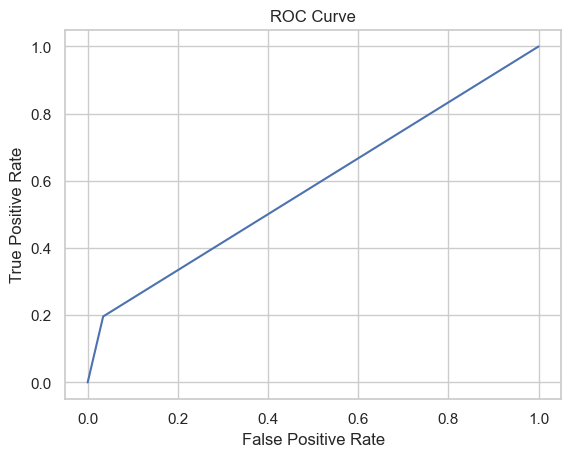

AUC: 0.5810


In [116]:
plot_roc_auc(model_dt, X_test, y_test)

##### **Random Forests**

In [117]:
from sklearn.ensemble import RandomForestClassifier

model_rf = confusion_metrix_and_classification_report(RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[1338    1]
 [  55    1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1339
           1       0.50      0.02      0.03        56

    accuracy                           0.96      1395
   macro avg       0.73      0.51      0.51      1395
weighted avg       0.94      0.96      0.94      1395



**Inspect importance rates of features for `Random Forest` model**

In [118]:
print("Model Feature Importance Report:")
make_importance_df(model_rf)

Model Feature Importance Report:


,Feature,Importance
0,glucose,0.200359
1,bmi,0.171763
2,systolic_bp,0.137895
3,age,0.125741
4,diastolic_bp,0.124077
5,pulse_rate,0.122643
6,hypertensive,0.073550
7,gender,0.022224
8,cardiovascular_disease,0.012390
9,family_hypertension,0.005009


**ROC and AUC**

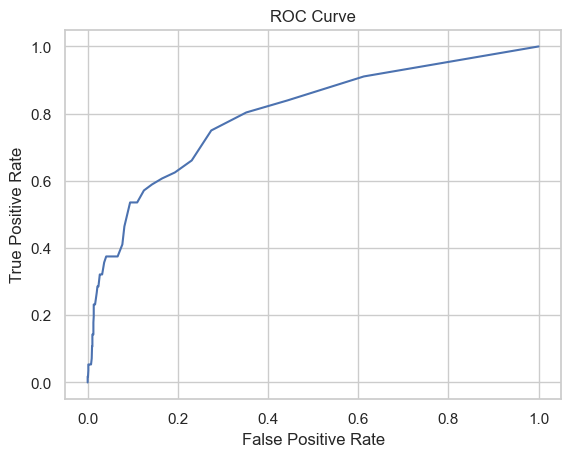

AUC: 0.7978


In [119]:
plot_roc_auc(model_rf, X_test, y_test)

##### **Naive Bayes**

In [120]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
model_gnb = confusion_metrix_and_classification_report(GaussianNB(), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[1249   90]
 [  26   30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1339
           1       0.25      0.54      0.34        56

    accuracy                           0.92      1395
   macro avg       0.61      0.73      0.65      1395
weighted avg       0.95      0.92      0.93      1395



**ROC and AUC**

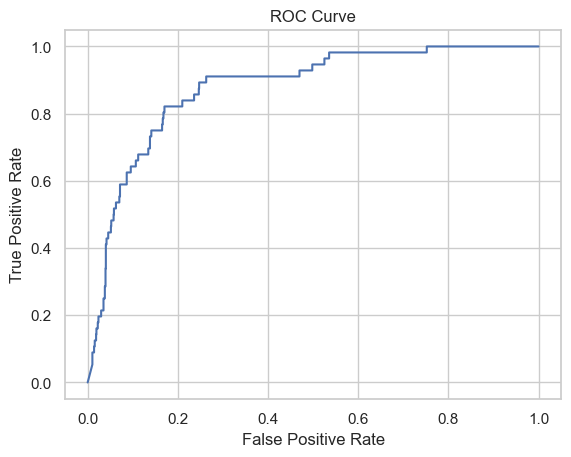

AUC: 0.8771


In [121]:
plot_roc_auc(model_gnb, X_test, y_test)

**Naive Bayes: BernoulliNB**

In [126]:
from sklearn.naive_bayes import BernoulliNB

# Create a Bernoulli Naive Bayes classifier
model_bnb = confusion_metrix_and_classification_report(BernoulliNB(), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[1331    8]
 [  54    2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1339
           1       0.20      0.04      0.06        56

    accuracy                           0.96      1395
   macro avg       0.58      0.51      0.52      1395
weighted avg       0.93      0.96      0.94      1395



**Naive Bayes: Multinomial**

In [127]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
model_mnb = confusion_metrix_and_classification_report(MultinomialNB(), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[1295   44]
 [  49    7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1339
           1       0.14      0.12      0.13        56

    accuracy                           0.93      1395
   macro avg       0.55      0.55      0.55      1395
weighted avg       0.93      0.93      0.93      1395



##### **Gradient Boosting Machines (GBM)**

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Regressor
model_gbr = confusion_metrix_and_classification_report(GradientBoostingClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[1330    9]
 [  51    5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1339
           1       0.36      0.09      0.14        56

    accuracy                           0.96      1395
   macro avg       0.66      0.54      0.56      1395
weighted avg       0.94      0.96      0.94      1395



**ROC and AUC**

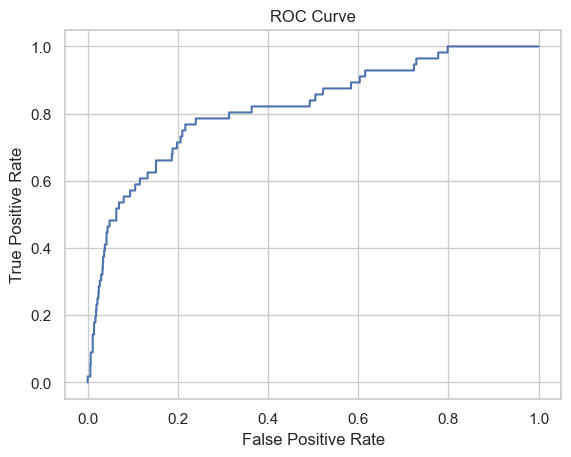

AUC: 0.8192


In [123]:
plot_roc_auc(model_gbr, X_test, y_test)

##### **Support Vector Machines (SVM) with Non-linear Kernels**

In [124]:
from sklearn.svm import SVC

# Create an SVM classifier with a non-linear kernel (e.g., 'rbf')
model_svm = confusion_metrix_and_classification_report(SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[856 483]
 [  9  47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      1339
           1       0.09      0.84      0.16        56

    accuracy                           0.65      1395
   macro avg       0.54      0.74      0.47      1395
weighted avg       0.95      0.65      0.75      1395



**ROC and AUC**

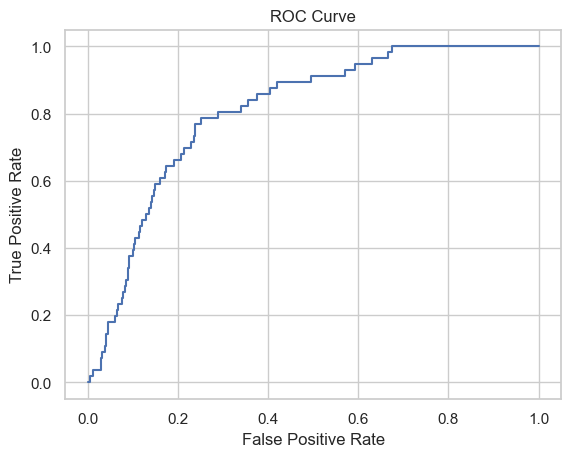

AUC: 0.8068


In [125]:
plot_roc_auc(model_svm, X_test, y_test)

#### **XGBoost**

In [132]:
from xgboost import XGBClassifier

# Create a CatBoost classifier
model_xgb = confusion_metrix_and_classification_report(XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss'), X_train, X_test, y_train, y_test)

Confusion Matrix:
[[1333    6]
 [  51    5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1339
           1       0.45      0.09      0.15        56

    accuracy                           0.96      1395
   macro avg       0.71      0.54      0.56      1395
weighted avg       0.94      0.96      0.95      1395



d:\School\ITC\Y3\Semet 1\Intro DS\Projects\Diabetes-Classification\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:31:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [136]:
make_importance_df(model_xgb)

,Feature,Importance
0,hypertensive,0.540566
1,family_diabetes,0.069738
2,glucose,0.068856
3,bmi,0.052854
4,age,0.051421
5,gender,0.047022
6,diastolic_bp,0.043831
7,systolic_bp,0.040720
8,pulse_rate,0.039606
9,cardiovascular_disease,0.032917


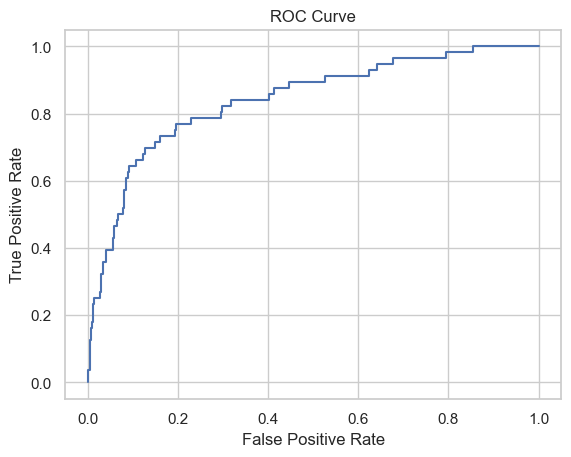

AUC: 0.8397


In [137]:
plot_roc_auc(model_xgb, X_test, y_test)

#### **LIGTHBoost**

In [142]:
from lightgbm import LGBMClassifier

# Create a LightGBM classifier
model_lgb = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary', random_state=42)

# Train the model and print the performance report
model_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 122, number of negative: 3130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 3252, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.037515 -> initscore=-3.244767
[LightGBM] [Info] Start training from score -3.244767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier(max_depth=3, objective='binary', random_state=42)

In [143]:
# Make predictions on the test set
y_pred = model_lgb.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1334    5]
 [  51    5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1339
           1       0.50      0.09      0.15        56

    accuracy                           0.96      1395
   macro avg       0.73      0.54      0.57      1395
weighted avg       0.94      0.96      0.95      1395



In [144]:
make_importance_df(model_lgb)

,Feature,Importance
0,glucose,156
1,bmi,98
2,diastolic_bp,85
3,pulse_rate,69
4,systolic_bp,65
5,age,64
6,hypertensive,25
7,gender,16
8,cardiovascular_disease,14
9,family_diabetes,2


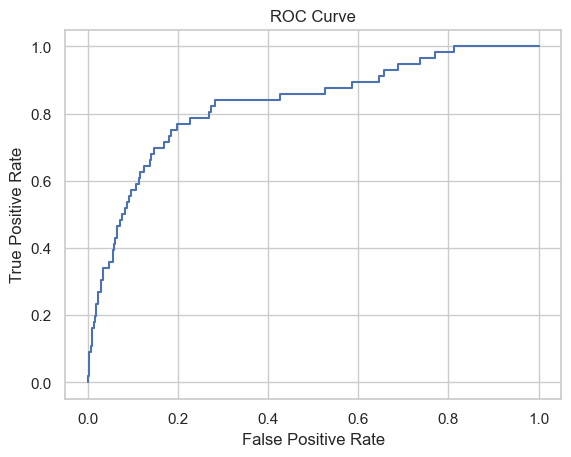

AUC: 0.8263


In [145]:
plot_roc_auc(model_lgb, X_test, y_test)